In [23]:
#Importing all the libraries required
import pyforest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn.cluster as cluster

In [24]:
#Reading the data from local machine
Train_data = pd.read_csv("C:\\Users\\Amith Reddy\\OneDrive\\Desktop\\Data Sets\\ALS_TrainingData_2223.csv")

<IPython.core.display.Javascript object>

In [25]:
Train_data

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


In [26]:
#Preprocessing the data, taking all the required features 
Train_df = Train_data[['Age_mean',
'Albumin_median',
'ALSFRS_Total_median',
'ALT.SGPT._median',
'AST.SGOT._median',
'Bicarbonate_median',
'Blood.Urea.Nitrogen..BUN._median',
'bp_diastolic_median',
'bp_systolic_median',
'Calcium_median',
'Chloride_median',
'Creatinine_median',
'Glucose_median',
'hands_median',
'Hematocrit_median',
'Hemoglobin_median',
'leg_median',
'mouth_median',
'onset_delta_mean',
'onset_site_mean',
'Platelets_median',
'Potassium_median',
'pulse_median',
'respiratory_median',
'Sodium_median',
'trunk_median',
'Urine.Ph_median',
'ALSFRS_slope']]

In [27]:
Train_df

,Age_mean,Albumin_median,ALSFRS_Total_median,ALT.SGPT._median,AST.SGOT._median,Bicarbonate_median,Blood.Urea.Nitrogen..BUN._median,bp_diastolic_median,bp_systolic_median,Calcium_median,...,onset_delta_mean,onset_site_mean,Platelets_median,Potassium_median,pulse_median,respiratory_median,Sodium_median,trunk_median,Urine.Ph_median,ALSFRS_slope
0,65,40.5,28.0,22.0,27.5,28.0,7.11945,83.0,139.0,2.220550,...,-1023,1,169.0,4.25,68.0,3.0,145.5,7.0,6.0,-0.965608
1,48,41.0,33.0,13.0,17.0,28.0,4.74630,78.0,132.5,2.170650,...,-341,1,264.0,4.30,76.0,4.0,138.0,7.0,5.0,-0.921717
2,38,47.0,14.0,20.0,19.0,29.0,4.38120,76.0,110.0,2.295400,...,-1181,1,213.0,4.00,73.0,4.0,143.0,0.0,5.0,-0.914787
3,63,44.0,29.0,60.0,40.0,20.0,8.03220,80.0,130.0,2.345300,...,-365,2,233.0,4.20,72.0,3.0,139.0,5.0,6.0,-0.598361
4,63,45.5,27.5,26.5,26.5,28.0,4.19865,80.0,130.0,2.257975,...,-1768,2,283.5,3.75,96.0,4.0,140.0,4.0,5.0,-0.444039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,49.0,32.5,27.0,27.0,28.0,3.65100,78.0,115.0,2.320350,...,-817,2,202.0,4.10,67.5,4.0,141.0,5.0,6.0,-0.239501
2219,61,45.0,26.0,18.0,22.0,27.8,5.00000,90.0,140.0,2.300000,...,-527,1,217.0,4.25,78.0,4.0,143.0,4.0,5.5,-0.388711
2220,47,44.0,23.0,76.5,46.0,28.0,6.43000,86.0,120.0,2.340000,...,-1589,2,222.0,3.95,86.0,4.0,141.0,4.0,6.0,-0.108631
2221,37,44.0,29.5,51.0,44.0,29.0,4.01610,77.0,122.0,2.320350,...,-558,2,237.0,4.20,90.0,4.0,139.0,4.5,5.0,-0.855880


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

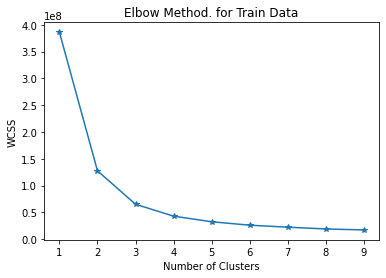

In [28]:
#Building Elbow method, wcss is within clusters sum of squares.
wcss=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(Train_df)
    wcss.append(kmeans.inertia_)
plt.title('Elbow Method. for Train Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(range(1,10),wcss,marker = '*')
plt.show()

In [29]:
#Finding the Silhouette score 
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,init='k-means++',random_state=200).fit(Train_df).labels_
    print("Silhouette score for cluster = " +str(i)+ " is "+str(metrics.silhouette_score(Train_df,labels,metric='euclidean',sample_size=1000,random_state=200)))

<IPython.core.display.Javascript object>

Silhouette score for cluster = 2 is 0.6146502214569362


<IPython.core.display.Javascript object>

Silhouette score for cluster = 3 is 0.5293525995236155


<IPython.core.display.Javascript object>

Silhouette score for cluster = 4 is 0.4847972474623274


<IPython.core.display.Javascript object>

Silhouette score for cluster = 5 is 0.43257325758057585


<IPython.core.display.Javascript object>

Silhouette score for cluster = 6 is 0.41097515333145546


<IPython.core.display.Javascript object>

Silhouette score for cluster = 7 is 0.37676184919454514


<IPython.core.display.Javascript object>

Silhouette score for cluster = 8 is 0.37806291852466234


<IPython.core.display.Javascript object>

Silhouette score for cluster = 9 is 0.3391390248011139


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

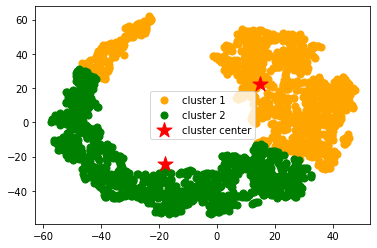

In [30]:
#plotting clusters with K = 2
tsne = TSNE().fit_transform(Train_df)

km = KMeans(n_clusters=2, random_state = 0)     
y_km = km.fit_predict(tsne)     

plt.scatter(tsne[y_km==0,0],tsne[y_km==0,1],s=50,c="orange",marker="o",label="cluster 1")    
plt.scatter(tsne[y_km==1,0],tsne[y_km==1,1],s=50,c="green",marker="o",label="cluster 2")  
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="red",label="cluster center")   
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

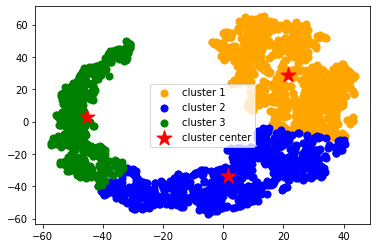

In [31]:
#plotting clusters with K = 3
tsne = TSNE().fit_transform(Train_df)

km = KMeans(n_clusters=3, random_state = 0)     
y_km = km.fit_predict(tsne)     

plt.scatter(tsne[y_km==0,0],tsne[y_km==0,1],s=50,c="orange",marker="o",label="cluster 1")    
plt.scatter(tsne[y_km==1,0],tsne[y_km==1,1],s=50,c="blue",marker="o",label="cluster 2")    
plt.scatter(tsne[y_km==2,0],tsne[y_km==2,1],s=50,c="green",marker="o",label="cluster 3") 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="red",label="cluster center")   
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

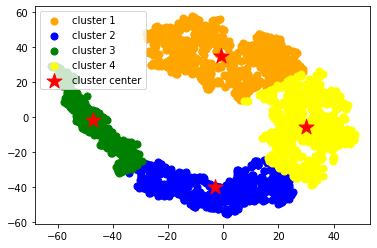

In [32]:
#plotting clusters with K = 4
tsne = TSNE().fit_transform(Train_df)

km = KMeans(n_clusters=4, random_state = 0)     
y_km = km.fit_predict(tsne)     

plt.scatter(tsne[y_km==0,0],tsne[y_km==0,1],s=50,c="orange",marker="o",label="cluster 1")    
plt.scatter(tsne[y_km==1,0],tsne[y_km==1,1],s=50,c="blue",marker="o",label="cluster 2")    
plt.scatter(tsne[y_km==2,0],tsne[y_km==2,1],s=50,c="green",marker="o",label="cluster 3") 
plt.scatter(tsne[y_km==3,0],tsne[y_km==3,1],s=50,c="yellow",marker="o",label="cluster 4")     
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="red",label="cluster center")   
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

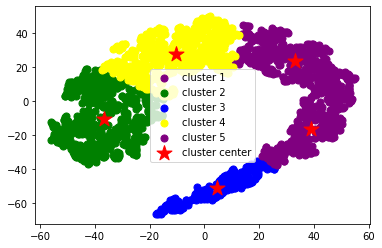

In [33]:
#plotting clusters with K = 5
tsne = TSNE().fit_transform(Train_df)

km = KMeans(n_clusters=5, random_state = 0)     
y_km = km.fit_predict(tsne)     

plt.scatter(tsne[y_km==0,0],tsne[y_km==0,1],s=50,c="purple",marker="o",label="cluster 1")    
plt.scatter(tsne[y_km==1,0],tsne[y_km==1,1],s=50,c="green",marker="o",label="cluster 2")    
plt.scatter(tsne[y_km==2,0],tsne[y_km==2,1],s=50,c="blue",marker="o",label="cluster 3") 
plt.scatter(tsne[y_km==3,0],tsne[y_km==3,1],s=50,c="yellow",marker="o",label="cluster 4") 
plt.scatter(tsne[y_km==4,0],tsne[y_km==4,1],s=50,c="purple",marker="o",label="cluster 5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="red",label="cluster center")   
plt.legend()

In [34]:
#Predicting the clusters for train data
Train_predict = km.fit_predict(Train_df)
Train_predict

array([2, 4, 2, ..., 3, 1, 4])

In [35]:
#Reading the Test data from local machine
Test_data = pd.read_csv("C:\\Users\\Amith Reddy\\OneDrive\\Desktop\\Data Sets\\ALS_TestingData_78_ML.csv")
Test_data

<IPython.core.display.Javascript object>

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,96,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,...,5,0.004329,6.0,5.50,5.0,0.002165,12.45,8.370,5.56,0.014913
74,97,47.709589,47.0,44.0,41,0.005381,-0.324733,26,19.0,11,...,0,0.005381,7.5,6.00,5.5,0.001845,13.92,10.265,8.37,0.004978
75,98,59.928767,47.0,44.0,40,0.009333,-0.330616,33,24.0,10,...,1,0.008000,7.5,6.50,6.0,0.002000,16.69,5.445,4.48,0.016280
76,99,61.000000,42.0,39.0,38,0.007843,-0.439230,37,33.0,31,...,4,0.005882,6.5,6.00,5.5,0.001961,10.66,7.390,5.81,0.009510


In [36]:
#Preprocessing the data, taking all the required features 
Test_df = Test_data[['Age_mean',
'Albumin_median',
'ALSFRS_Total_median',
'ALT.SGPT._median',
'AST.SGOT._median',
'Basophils_median',
'Bicarbonate_median',
'Bilirubin..total._median',
'Blood.Urea.Nitrogen..BUN._median',
'bp_diastolic_median',
'bp_systolic_median',
'Calcium_median',
'Chloride_median',
'Creatinine_median',
'Eosinophils_median',
'Glucose_median',
'hands_median',
'Hematocrit_median',
'Hemoglobin_median',
'leg_median',
'Lymphocytes_median',
'Monocytes_median',
'mouth_median',
'onset_delta_mean',
'onset_site_mean',
'Platelets_median',
'Potassium_median',
'pulse_median',
'Red.Blood.Cells..RBC._median',
'respiratory_median',
'Sodium_median',
'trunk_median',
'Urine.Ph_median',
'White.Blood.Cell..WBC._median',
'ALSFRS_slope']]
Test_df

,Age_mean,Albumin_median,ALSFRS_Total_median,ALT.SGPT._median,AST.SGOT._median,Basophils_median,Bicarbonate_median,Bilirubin..total._median,Blood.Urea.Nitrogen..BUN._median,bp_diastolic_median,...,Platelets_median,Potassium_median,pulse_median,Red.Blood.Cells..RBC._median,respiratory_median,Sodium_median,trunk_median,Urine.Ph_median,White.Blood.Cell..WBC._median,ALSFRS_slope
0,65.906849,44.0,5.0,26.0,24.0,0.5,25.0,7.00,7.100,76.0,...,275.0,4.20,77.0,4640,0.0,138.0,0.0,6.00,7.680,-1.767329
1,54.000000,36.0,23.0,35.5,33.0,0.7,25.0,9.50,4.300,96.0,...,270.0,4.20,80.0,5100,4.0,140.5,3.0,5.50,6.620,-1.351852
2,56.394521,43.0,10.0,22.0,22.0,0.7,24.0,3.00,5.400,72.5,...,391.0,4.50,103.5,4590,4.0,139.0,0.0,6.75,7.160,-0.412429
3,72.619178,42.5,24.0,39.5,42.0,0.7,26.0,5.00,5.200,59.0,...,383.0,4.50,73.0,3950,4.0,140.0,5.5,7.00,7.905,-0.383403
4,65.000000,42.0,37.0,16.5,25.0,0.8,22.9,9.50,6.100,85.0,...,258.0,4.45,67.5,4700,4.0,144.0,7.0,5.50,9.290,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,45.000000,39.5,28.0,60.0,50.0,0.4,23.2,9.00,5.700,85.0,...,219.0,4.45,80.0,4700,2.0,140.5,7.0,5.50,8.370,-0.683521
74,47.709589,44.0,19.0,16.0,21.0,0.4,23.5,5.00,4.600,87.0,...,499.0,4.30,88.0,4675,4.0,139.0,1.0,6.00,10.265,-0.324733
75,59.928767,44.0,24.0,24.0,23.0,0.5,27.0,3.00,6.100,90.0,...,248.0,4.20,94.0,4210,4.0,142.0,4.0,6.50,5.445,-0.330616
76,61.000000,39.0,33.0,16.0,24.0,0.6,24.4,13.68,4.284,72.0,...,230.5,4.20,72.0,4600,4.0,140.0,5.0,6.00,7.390,-0.439230


C:\Users\Amith Reddy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

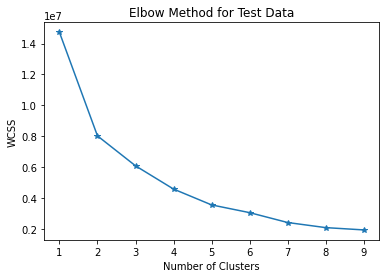

In [37]:
#Building Elbow method, wcss is within clusters sum of squares.
wcss=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(Test_df)
    wcss.append(kmeans.inertia_)
plt.title('Elbow Method for Test Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(range(1,10),wcss,marker = '*')
plt.show()

In [38]:
#Finding the Silhouette score 
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,init='k-means++',random_state=200).fit(Test_df).labels_
    print("Silhouette score for cluster = " +str(i)+ " is "+str(metrics.silhouette_score(Test_df,labels,metric='euclidean',sample_size=1000,random_state=200)))

<IPython.core.display.Javascript object>

Silhouette score for cluster = 2 is 0.37311568244051774


<IPython.core.display.Javascript object>

Silhouette score for cluster = 3 is 0.30408904425567396


<IPython.core.display.Javascript object>

Silhouette score for cluster = 4 is 0.3210521690534384


<IPython.core.display.Javascript object>

Silhouette score for cluster = 5 is 0.32019328594187607


<IPython.core.display.Javascript object>

Silhouette score for cluster = 6 is 0.331100154529059


<IPython.core.display.Javascript object>

Silhouette score for cluster = 7 is 0.37040031365666964


<IPython.core.display.Javascript object>

Silhouette score for cluster = 8 is 0.3487385082098975


<IPython.core.display.Javascript object>

Silhouette score for cluster = 9 is 0.33080120446916805


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

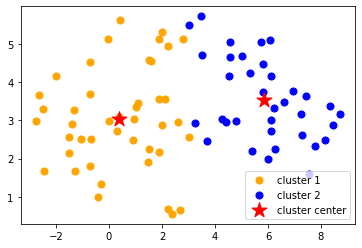

In [39]:
#plotting clusters with K = 2
tsne = TSNE().fit_transform(Test_df)

km = KMeans(n_clusters=2, random_state = 0)     
y_km = km.fit_predict(tsne)     

plt.scatter(tsne[y_km==0,0],tsne[y_km==0,1],s=50,c="orange",marker="o",label="cluster 1")    
plt.scatter(tsne[y_km==1,0],tsne[y_km==1,1],s=50,c="blue",marker="o",label="cluster 2")      
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="red",label="cluster center")   
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

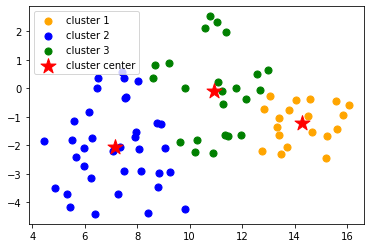

In [40]:
#plotting clusters with K = 3
tsne = TSNE().fit_transform(Test_df)

km = KMeans(n_clusters=3, random_state = 0)     
y_km = km.fit_predict(tsne)     

plt.scatter(tsne[y_km==0,0],tsne[y_km==0,1],s=50,c="orange",marker="o",label="cluster 1")    
plt.scatter(tsne[y_km==1,0],tsne[y_km==1,1],s=50,c="blue",marker="o",label="cluster 2")    
plt.scatter(tsne[y_km==2,0],tsne[y_km==2,1],s=50,c="green",marker="o",label="cluster 3")     
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="red",label="cluster center")   
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

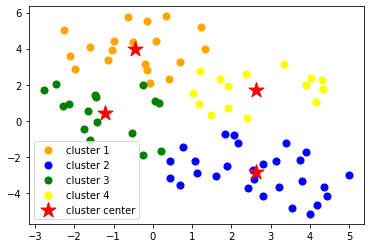

In [41]:
#plotting clusters with K = 4
tsne = TSNE().fit_transform(Test_df)

km = KMeans(n_clusters=4, random_state = 0)     
y_km = km.fit_predict(tsne)     

plt.scatter(tsne[y_km==0,0],tsne[y_km==0,1],s=50,c="orange",marker="o",label="cluster 1")    
plt.scatter(tsne[y_km==1,0],tsne[y_km==1,1],s=50,c="blue",marker="o",label="cluster 2")    
plt.scatter(tsne[y_km==2,0],tsne[y_km==2,1],s=50,c="green",marker="o",label="cluster 3") 
plt.scatter(tsne[y_km==3,0],tsne[y_km==3,1],s=50,c="yellow",marker="o",label="cluster 4")     
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="red",label="cluster center")   
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

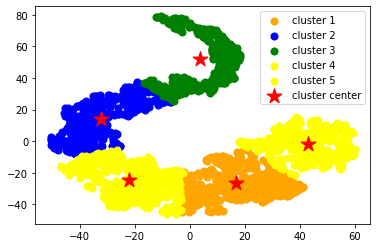

In [42]:
#plotting clusters with K = 5
tsne = TSNE().fit_transform(Train_df)

km = KMeans(n_clusters=5, random_state = 0)     
y_km = km.fit_predict(tsne)     

plt.scatter(tsne[y_km==0,0],tsne[y_km==0,1],s=50,c="orange",marker="o",label="cluster 1")    
plt.scatter(tsne[y_km==1,0],tsne[y_km==1,1],s=50,c="blue",marker="o",label="cluster 2")    
plt.scatter(tsne[y_km==2,0],tsne[y_km==2,1],s=50,c="green",marker="o",label="cluster 3") 
plt.scatter(tsne[y_km==3,0],tsne[y_km==3,1],s=50,c="yellow",marker="o",label="cluster 4")     
plt.scatter(tsne[y_km==4,0],tsne[y_km==4,1],s=50,c="yellow",marker="o",label="cluster 5")     
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="red",label="cluster center")   
plt.legend()

In [43]:
#Predicting the clusters for test data
Test_predict = km.fit_predict(Test_df)
Test_predict

array([2, 4, 3, 0, 4, 0, 3, 2, 2, 4, 3, 1, 2, 4, 2, 3, 1, 1, 4, 4, 4, 3,
       4, 1, 3, 4, 0, 0, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 0, 4, 1, 1, 4, 0,
       1, 2, 3, 3, 4, 2, 2, 2, 1, 2, 4, 0, 2, 1, 4, 0, 2, 4, 4, 4, 1, 2,
       4, 4, 2, 2, 3, 3, 4, 4, 3, 0, 2, 2])